# Constitutional Cherrypicking Toolkit

## Initialize

In [1]:
%run ./_library/packages.py
%run ./_library/utilities.py

exclusion_list = []
encoder,model_dict = initialise(exclusion_list=exclusion_list)

Initialisation started…
Finished initialisation.


## N-Gram Searches

### Chile

In [ ]:
%run -i ./_library/ngram_search_chile.py

### Cuba

In [2]:
%run -i ./_library/ngram_search_cuba.py

## Semantic Similarity

### Chile

In [ ]:
choice_dict = init_choice_dict()
generate_corpus_interface(choice_dict,model_dict,0.64,0.74)

In [ ]:
# Import necessary modules
%run -i ./_library/semantic_search_chile.py

import os
import pandas as pd

# Path to the outputs folder
outputs_folder = "outputs/Chile"

# Load reviewed segments from all .xlsx files in the outputs folder
reviewed_segment_ids = set()
for file_name in os.listdir(outputs_folder):  # Iterate through files in the folder
    if file_name.endswith(".xlsx"):  # Check for Excel files
        file_path = os.path.join(outputs_folder, file_name)  # Get the full file path
        try:
            df = pd.read_excel(file_path)  # Read the Excel file
            if 'segment_ID' in df.columns:  # Check for the correct column
                reviewed_segment_ids.update(df['segment_ID'].dropna().unique())  # Add unique segment IDs
            else:
                print(f"Warning: 'segment_ID' column not found in {file_path}")
        except FileNotFoundError:
            print(f"Warning: File not found - {file_path}")
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

# Run the search with the reviewed segment IDs
if len(choice_dict['topic']) > 0:
    print('Search topic:', choice_dict['topic'])
    run_search(choice_dict, model_dict, encoder, reviewed_segment_ids)  # Pass the reviewed IDs
else:
    alert('No topic selected.')


In [ ]:
import os
import pandas as pd

def combine_and_deduplicate_chile(output_folder="outputs/Chile", combined_file="outputs/Chile/final_results.xlsx"):
    """
    Combine all Excel files in the specified folder, remove duplicates based on 'segment_ID',
    drop unnecessary columns, sort by 'segment_ID', and save the cleaned data to a new file
    while ensuring numbers are stored as numbers and missing values remain blank.
    """
    all_data = []  # List to store data from all files

    # Loop through all files in the folder
    for file in os.listdir(output_folder):
        if file.endswith(".xlsx"):  # Only process Excel files
            file_path = os.path.join(output_folder, file)
            print(f"Reading file: {file_path}")
            try:
                # Read Excel file with dtype=str to preserve text formatting
                df = pd.read_excel(file_path, dtype=str, keep_default_na=False)
                
                # Drop 'Cluster' and 'semantic_score' columns if they exist
                df.drop(columns=[col for col in ['Cluster', 'semantic_score'] if col in df.columns], inplace=True, errors='ignore')

                all_data.append(df)
            except Exception as e:
                print(f"Error reading {file}: {e}")

    # Combine all data into a single DataFrame
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        print(f"Total rows before deduplication: {len(combined_df)}")

        # Remove duplicates based on 'segment_ID', ensuring speaker info is not lost
        deduplicated_df = combined_df.sort_values(by="segment_ID", key=lambda col: col.str.lower()).drop_duplicates(subset='segment_ID', keep='first')
        print(f"Total rows after deduplication: {len(deduplicated_df)}")

        # Handle missing values without removing valid data
        for col in deduplicated_df.columns:
            deduplicated_df[col] = deduplicated_df[col].replace([float('inf'), float('-inf')], None)  # Replace infinities with None
            deduplicated_df[col] = deduplicated_df[col].apply(lambda x: None if pd.isna(x) or x.strip() in ["nan", "NaN", ""] else x)  # Keep valid data

        # Convert numeric columns back to numbers (ensure they are not stored as text)
        numeric_columns = ["ID", "district", "sex", "age_jul2021", "ideology1", "sd1", "ideology2", "sd2"]
        for col in numeric_columns:
            if col in deduplicated_df.columns:
                deduplicated_df[col] = pd.to_numeric(deduplicated_df[col], errors="coerce")  # Convert valid numbers

        # Replace NaN in numeric columns with None to avoid xlsxwriter errors
        deduplicated_df[numeric_columns] = deduplicated_df[numeric_columns].where(pd.notna(deduplicated_df[numeric_columns]), None)

        # Save to Excel WITHOUT header formatting
        os.makedirs(os.path.dirname(combined_file), exist_ok=True)  # Ensure output directory exists
        
        with pd.ExcelWriter(combined_file, engine="xlsxwriter") as writer:
            workbook = writer.book
            worksheet = workbook.add_worksheet("final_results")

            # Remove bold/border formatting from headers
            header_format = workbook.add_format({'bold': False, 'border': 0, 'align': 'left'})
            worksheet.write_row(0, 0, deduplicated_df.columns, header_format)

            # Ensure NaN/None values do not cause errors when writing rows
            for row_num, row_data in enumerate(deduplicated_df.itertuples(index=False, name=None), start=1):
                cleaned_row = ["" if pd.isna(x) or x is None else x for x in row_data]  # Convert NaN/None to empty strings
                worksheet.write_row(row_num, 0, cleaned_row)

        print(f"Combined, deduplicated, and sorted data saved to: {combined_file}")
    else:
        print("No valid Excel files found in the folder.")

# Run the function
combine_and_deduplicate_chile()


### Cuba

In [ ]:
choice_dict = init_choice_dict()
generate_corpus_interface(choice_dict,model_dict,0.64,0.74)

In [ ]:
# Import necessary modules
%run -i ./_library/semantic_search_cuba.py

import os
import pandas as pd

# Path to the outputs folder
outputs_folder = "outputs/Cuba"

# Load reviewed segments from all .xlsx files in the outputs folder
reviewed_segment_ids = set()
for file_name in os.listdir(outputs_folder):  # Iterate through files in the folder
    if file_name.endswith(".xlsx"):  # Check for Excel files
        file_path = os.path.join(outputs_folder, file_name)  # Get the full file path
        try:
            df = pd.read_excel(file_path)  # Read the Excel file
            if 'segment_ID' in df.columns:  # Check for the correct column
                reviewed_segment_ids.update(df['segment_ID'].dropna().unique())  # Add unique segment IDs
            else:
                print(f"Warning: 'segment_ID' column not found in {file_path}")
        except FileNotFoundError:
            print(f"Warning: File not found - {file_path}")
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

# Run the search with the reviewed segment IDs
if len(choice_dict['topic']) > 0:
    print('Search topic:', choice_dict['topic'])
    run_search(choice_dict, model_dict, encoder, reviewed_segment_ids)  # Pass the reviewed IDs
else:
    alert('No topic selected.')


In [ ]:
import os
import pandas as pd

def combine_and_deduplicate(output_folder="outputs/Cuba", combined_file="outputs/Cuba/final_results.xlsx"):
    """
    Combine all Excel files in the specified folder, remove duplicates based on 'segment_ID',
    drop unnecessary columns, sort by 'segment_ID', and save the cleaned data to a new file
    while ensuring numbers are stored as numbers and missing values remain blank.
    """
    all_data = []  # List to store data from all files

    # Loop through all files in the folder
    for file in os.listdir(output_folder):
        if file.endswith(".xlsx"):  # Only process Excel files
            file_path = os.path.join(output_folder, file)
            print(f"Reading file: {file_path}")
            try:
                # Read Excel file with dtype=str to preserve text formatting
                df = pd.read_excel(file_path, dtype=str, keep_default_na=False)
                
                # Drop 'Cluster' and 'semantic_score' columns if they exist
                df.drop(columns=[col for col in ['Cluster', 'semantic_score'] if col in df.columns], inplace=True, errors='ignore')

                all_data.append(df)
            except Exception as e:
                print(f"Error reading {file}: {e}")

    # Combine all data into a single DataFrame
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        print(f"Total rows before deduplication: {len(combined_df)}")

        # Remove duplicates based on 'segment_ID', ensuring speaker info is not lost
        deduplicated_df = combined_df.sort_values(by="segment_ID", key=lambda col: col.str.lower()).drop_duplicates(subset='segment_ID', keep='first')
        print(f"Total rows after deduplication: {len(deduplicated_df)}")

        # Handle missing values without removing valid data
        for col in deduplicated_df.columns:
            deduplicated_df[col] = deduplicated_df[col].replace([float('inf'), float('-inf')], None)  # Replace infinities with None
            deduplicated_df[col] = deduplicated_df[col].apply(lambda x: None if pd.isna(x) or x.strip() in ["nan", "NaN", ""] else x)  # Keep valid data

        # Convert numeric columns back to numbers (ensure they are not stored as text)
        numeric_columns = ["seat", "vote_perc", "sex", "age_feb2018", 
                           "PCC", "CDR", "CTC", "FMC", "ANAP", "ACRC", "FEU", "UJC", 
                           "central_committee", "politburo", "draft_commission"]
        for col in numeric_columns:
            if col in deduplicated_df.columns:
                deduplicated_df[col] = pd.to_numeric(deduplicated_df[col], errors="coerce")  # Convert valid numbers

        # Replace NaN in numeric columns with None to avoid xlsxwriter errors
        deduplicated_df[numeric_columns] = deduplicated_df[numeric_columns].where(pd.notna(deduplicated_df[numeric_columns]), None)

        # Save to Excel WITHOUT header formatting
        os.makedirs(os.path.dirname(combined_file), exist_ok=True)  # Ensure output directory exists
        
        with pd.ExcelWriter(combined_file, engine="xlsxwriter") as writer:
            workbook = writer.book
            worksheet = workbook.add_worksheet("final_results")

            # Remove bold/border formatting from headers
            header_format = workbook.add_format({'bold': False, 'border': 0, 'align': 'left'})
            worksheet.write_row(0, 0, deduplicated_df.columns, header_format)

            # Ensure NaN/None values do not cause errors when writing rows
            for row_num, row_data in enumerate(deduplicated_df.itertuples(index=False, name=None), start=1):
                cleaned_row = ["" if pd.isna(x) or x is None else x for x in row_data]  # Convert NaN/None to empty strings
                worksheet.write_row(row_num, 0, cleaned_row)

        print(f"Combined, deduplicated, and sorted data saved to: {combined_file}")
    else:
        print("No valid Excel files found in the folder.")

# Run the function
combine_and_deduplicate()


## Results

### Chile

#### Bar plot and pie chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_and_pie_chart_chile(file_path="outputs/Chile/final_results.xlsx", save_path="/Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Chile/visualizations/references_chile.png"):
    """
    Generates a horizontal bar chart where categories (Agenda-setting, Citation, etc.) are on the Y-axis.
    The pie chart remains unchanged but with Citation appearing at the top and adjusted label placement.
    """
    try:
        # Load the dataset
        df = pd.read_excel(file_path, dtype=str)

        # Drop missing or blank values in relevant columns
        df = df.dropna(subset=['tags', 'full_name'])
        df = df[(df['tags'].str.strip() != "") & (df['full_name'].str.strip() != "")]

        # Count occurrences of each category
        category_group_counts = df.groupby('tags').size()

        # Rename categories
        rename_map = {
            'agenda': 'Agenda-setting',
            'citation': 'Citation',
            'critique': 'Critique',
            'justification': 'Justification',
            'legitimacy': 'Legitimacy',
            'rejection': 'Rejection'
        }
        category_group_counts = category_group_counts.rename(index=rename_map)

        # Sort by total references per category
        category_group_counts = category_group_counts.sort_values(ascending=True)

        # Prepare pie chart data (sum all tag categories)
        tag_totals = category_group_counts

        # Sort the pie chart so Citation appears at the top
        tag_totals = tag_totals.sort_values(ascending=False)

        # Define color palette with muted and unique colors
        pie_colors = {
            'Agenda-setting': '#1f77b4',   # Blue
            'Citation': '#df5151',        # Red
            'Critique': '#9467bd',        # Purple
            'Justification': '#e377c2',   # Pink
            'Legitimacy': '#bcbd22',      # Olive
            'Rejection': '#17becf'        # Teal
        }

        # Create figure with two subplots
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7), gridspec_kw={'width_ratios': [2, 1]})

        # Horizontal bar chart
        bars = axes[0].barh(category_group_counts.index, category_group_counts.values, color=[pie_colors[col] for col in category_group_counts.index])

        # Add counts on the end of each bar
        for bar in bars:
            width_value = bar.get_width()
            axes[0].text(width_value + 3, bar.get_y() + bar.get_height()/2, f"{int(width_value)}",
                         ha='left', va='center', fontsize=12)  # Increased the font size for better readability

        # Formatting
        axes[0].set_xlabel("Number of References", fontsize=12)
        axes[0].set_ylabel("Category", fontsize=12)

        # Set xlim to adjust space for counts
        max_value = category_group_counts.max()
        axes[0].set_xlim(0, max_value * 1.1)  # Increase xlim by 20%

        # Add grey grid lines
        axes[0].grid(axis='x', linestyle="--", alpha=0.7, color='grey')

        # Adjust layout to give more space for counts
        plt.tight_layout(pad=2)

        # Adjusted pie chart for overall category distribution (Citation on top)
        wedges, texts, autotexts = axes[1].pie(
            tag_totals, labels=tag_totals.index, autopct='%1.1f%%',
            colors=[pie_colors[col] for col in tag_totals.index],
            pctdistance=0.7,
            labeldistance=1.1,  # Pushes labels further into their respective sections
            textprops={'fontsize': 12},  # Increased font size for readability
            startangle=0  # Rotates the pie chart so Citation appears on top
        )
        axes[1].set_title("Overall Distribution of Categories", fontsize=14)

        # Save the figure as PNG
        plt.savefig(save_path, bbox_inches='tight')

        # Show the plot
        plt.show()

    except Exception as e:
        print(f"Error processing the file: {e}")

# Run the function and save the plot
plot_bar_and_pie_chart_chile(file_path="outputs/Chile/final_results.xlsx", save_path="/Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Chile/visualizations/references_chile.png")


#### Ideology boxplot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_boxplot_by_category(file_path="outputs/Chile/final_results.xlsx", save_path="/Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Chile/visualizations/boxplot_chile.png"):
    """
    Generates horizontal boxplots embedded within violin plots for each category based on unique ideology scores per speaker,
    ordered by median ideology score. Adds stripplots to show the frequency distribution of tag counts.
    """
    try:
        # Load the dataset
        df = pd.read_excel(file_path, dtype=str)

        # Drop missing or blank values in relevant columns
        df = df.dropna(subset=['tags', 'full_name', 'ideology1'])
        df = df[(df['tags'].str.strip() != "") & (df['full_name'].str.strip() != "") & (df['ideology1'].str.strip() != "")]

        # Convert ideology1 to numeric
        df['ideology1'] = pd.to_numeric(df['ideology1'], errors='coerce')

        # Rename categories
        rename_map = {
            'agenda': 'Agenda-setting',
            'citation': 'Citation',
            'critique': 'Critique',
            'justification': 'Justification',
            'legitimacy': 'Legitimacy',
            'rejection': 'Rejection'
        }
        df['tags'] = df['tags'].replace(rename_map)

        # Keep unique speaker-category combinations
        unique_speaker_category = df.drop_duplicates(subset=['tags', 'full_name'])

        # Calculate median ideology score for each category based on unique speaker-category combinations
        medians = unique_speaker_category.groupby('tags')['ideology1'].median()
        median_order = medians.sort_values().index.tolist()

        # Define color palette with muted and unique colors
        pie_colors = {
            'Agenda-setting': '#1f77b4',   # Blue
            'Citation': '#df5151',        # Red
            'Critique': '#9467bd',        # Purple
            'Justification': '#e377c2',   # Pink
            'Legitimacy': '#bcbd22',      # Olive
            'Rejection': '#17becf'        # Teal
        }

        # Plotting
        plt.figure(figsize=(12, 8))

        # Add violin plot with KDE adjustments
        sns.violinplot(y='tags', x='ideology1', data=df, hue='tags', palette=pie_colors, 
                       inner=None, order=median_order, alpha=0.5, legend=False, bw_adjust=0.3, cut=0)

        # Add boxplot with transparent fill and bolder median line
        sns.boxplot(y='tags', x='ideology1', data=unique_speaker_category, 
                    width=0.1, showcaps=True, boxprops={'facecolor':'none', 'edgecolor':'black', 'linewidth':0.8}, 
                    whiskerprops={'linewidth':0.8}, medianprops={'color':'#333333', 'linewidth':1.5}, 
                    showfliers=False, order=median_order)

        # Add stripplot with adjusted jitter to reduce overlap
        sns.stripplot(y='tags', x='ideology1', data=unique_speaker_category, 
                      jitter=0.15, color='black', alpha=0.5, size=4, order=median_order)

        # Add vertical grey dashed lines from the x-axis
        for x in range(-1, 2):  # Adjusted range to fit -1 to 1
            plt.axvline(x=x, color='grey', linestyle='--', linewidth=0.8)

        # Move median labels slightly up
        for i, category in enumerate(median_order):
            median = medians[category]
            plt.text(median, i + 0.28, f'{median:.2f}', ha='center', va='bottom', fontsize=10, color='black')

        # Adjust x-axis limits to fit violins
        plt.xlim(-1, 1)

        # Add grid lines
        plt.grid(axis='x', linestyle='--', color='grey', alpha=0.7)

        # Formatting
        plt.ylabel("Category", fontsize=12)
        plt.xlabel("Ideology Score", fontsize=12)

        # Save the plot
        plt.tight_layout()
        plt.savefig(save_path)

        # Show the plot
        plt.show()

    except Exception as e:
        print(f"Error processing the file: {e}")


# Run the function and save the plot
plot_boxplot_by_category(file_path="outputs/Chile/final_results.xlsx", save_path="/Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Chile/visualizations/boxplot_chile.png")

#### Speaker graph

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Load the dataset
file_path = "outputs/Chile/final_results.xlsx"
df = pd.read_excel(file_path, dtype=str)

# Clean the data
df = df.dropna(subset=['tags', 'full_name', 'elec_list'])
df = df[(df['tags'].str.strip() != "") & (df['full_name'].str.strip() != "") & (df['elec_list'].str.strip() != "")]

# Rename categories for clarity
rename_map = {
    'agenda': 'Agenda-setting',
    'citation': 'Citation',
    'critique': 'Critique',
    'justification': 'Justification',
    'legitimacy': 'Legitimacy',
    'rejection': 'Rejection'
}
df['tags'] = df['tags'].replace(rename_map)

# Define color palette for tags
pie_colors = {
    'Agenda-setting': '#1f77b4',   # Blue
    'Citation': '#df5151',        # Red
    'Critique': '#9467bd',        # Purple
    'Justification': '#e377c2',   # Pink
    'Legitimacy': '#bcbd22',      # Olive
    'Rejection': '#17becf'        # Teal
}

# Define color palette for electoral lists
elec_list_colors = {
    'Vamos por Chile': '#004592',
    'Apruebo Dignidad': '#FF3954',
    'La Lista del Pueblo': '#D4287E',
    'Lista del Apruebo': '#663F8C',
    'Independientes por la Nueva Constitución': '#0D0E59',
    'No list': '#877165'
}

# Group all other electoral lists as 'Independientes' with a darker grey color
independientes_color = '#808080'
df['elec_list'] = df['elec_list'].apply(lambda x: x if x in elec_list_colors else 'Independientes')
elec_list_colors['Independientes'] = independientes_color

# Group by speaker and count tags
speaker_tag_counts = df.groupby(['full_name', 'tags']).size().unstack(fill_value=0)

# Add electoral list information
speaker_elec_list = df.drop_duplicates(subset=['full_name'])[['full_name', 'elec_list']].set_index('full_name')
speaker_tag_counts = speaker_tag_counts.merge(speaker_elec_list, left_index=True, right_index=True)

# Calculate total tag count per speaker
speaker_tag_counts['Total'] = speaker_tag_counts.drop(columns='elec_list').sum(axis=1)

# Filter speakers with 10 or more total tags
speaker_tag_counts = speaker_tag_counts[speaker_tag_counts['Total'] >= 10]

# Sort speakers by total tag count in ascending order
speaker_tag_counts = speaker_tag_counts.sort_values(by='Total', ascending=True)

# Plotting the horizontal stacked bar chart for speakers
ax = speaker_tag_counts.drop(columns=['Total', 'elec_list']).plot(
    kind='barh', 
    stacked=True, 
    figsize=(14, 10), 
    color=[pie_colors.get(tag, '#333333') for tag in speaker_tag_counts.columns if tag not in ['Total', 'elec_list']]
)

# Add color-coded squares in the y-axis to the left of each speaker's name
ax.set_yticklabels([
    f"\u25A0 {name}" 
    for name, elec_list in zip(speaker_tag_counts.index, speaker_tag_counts['elec_list'])
])

# Apply the corresponding color to each square
for tick_label, (index, row) in zip(ax.get_yticklabels(), speaker_tag_counts.iterrows()):
    tick_label.set_color(elec_list_colors.get(row['elec_list'], independientes_color))

# Add total references count to the right of each bar
for i, (index, row) in enumerate(speaker_tag_counts.iterrows()):
    total_references = row['Total']
    ax.text(
        total_references + 0.5,  # Position slightly to the right of the bar
        i,  # Align with the bar
        str(total_references),  # Text to display
        va='center',  # Vertical alignment
        fontsize=10  # Font size
    )

# Filter electoral lists to only include those of displayed speakers
shown_elec_lists = sorted(speaker_tag_counts['elec_list'].unique())

# Rename 'No list' to 'Reserved seats' in the legend
legend_labels = {elec_list: ('Reserved seats' if elec_list == 'No list' else elec_list) for elec_list in shown_elec_lists}
patches_elec_lists = [mpatches.Patch(color=elec_list_colors[elec_list], label=legend_labels[elec_list]) for elec_list in shown_elec_lists]

# Create separate legends for tag categories and filtered electoral lists
patches_tags = [mpatches.Patch(color=color, label=tag) for tag, color in pie_colors.items()]

# Place the legends stacked vertically
legend1 = plt.legend(handles=patches_tags, title='Tag Categories', bbox_to_anchor=(1.175, 0.75), loc='upper left')
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=patches_elec_lists, title='Electoral Lists', bbox_to_anchor=(1.05, 0.5), loc='upper left')

# Add vertical grid lines from the x-axis
ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.7)

plt.xlabel('Frequency of Tags')
plt.ylabel('Convention Member')

plt.tight_layout()

# Save the plot
plt.savefig("/Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Chile/visualizations/distribution_of_tags_by_speaker.png")

plt.show()


#### Tag count

In [ ]:
import pandas as pd

def count_tags(file_path="outputs/Chile/final_results.xlsx"):
    """
    Reads the final results Excel file, counts occurrences of each unique tag in the 'tags' column,
    and calculates the percentage of each tag relative to the total number of rows.
    
    Optionally saves the results to an Excel file if 'save_path' is provided.
    """
    try:
        # Load the Excel file
        df = pd.read_excel(file_path, dtype=str)

        # Drop missing or blank values in 'tags' column
        df = df.dropna(subset=['tags'])
        df = df[df['tags'].str.strip() != ""]  # Remove empty strings

        # Count occurrences of each tag
        tag_counts = df['tags'].value_counts().reset_index()
        tag_counts.columns = ['Tag', 'Count']

        # Calculate percentage of each tag
        total_rows = len(df)
        tag_counts['Percentage'] = (tag_counts['Count'] / total_rows) * 100

        # Display the results
        print(tag_counts)

    except Exception as e:
        print(f"Error processing the file: {e}")

# Run the function
count_tags(file_path="outputs/Chile/final_results.xlsx")


def count_unique_names(file_path="outputs/Chile/final_results.xlsx"):
    """
    Reads the final results Excel file and counts the number of unique names 
    in the 'full_name' column.
    
    Displays the total count of unique names.
    """
    try:
        # Load the Excel file
        df = pd.read_excel(file_path, dtype=str)

        # Drop missing or blank values in 'full_name' column
        df = df.dropna(subset=['full_name'])
        df = df[df['full_name'].str.strip() != ""]  # Remove empty strings

        # Count the number of unique names
        unique_names_count = df['full_name'].nunique()

        # Display the result
        print(f"Total unique names: {unique_names_count}")

    except Exception as e:
        print(f"Error processing the file: {e}")

# Run the function
count_unique_names(file_path="outputs/Chile/final_results.xlsx")



#### N-gram frequencies

In [ ]:
# Updated N-gram List for Public Consultation in Spanish
ngram_list = [
    "participación ciudadana", "participación popular", "audiencias públicas", 
    "cabildos", "semanas territoriales", "iniciativas populares", "foros deliberativos",
    "encuentros autoconvocados", "plebiscito dirimente", "jornada nacional de deliberación",
    "foros deliberativos"
]

def calculate_ngram_references_per_10000(data, ngram_list):
    """
    Calculate references to n-grams per 10,000 words independently of the global n-gram tool.

    Parameters:
    - data: List of tuples, where each tuple contains segment metadata and text. Example: [(id, text), ...]
    - ngram_list: List of n-grams to calculate frequencies for.

    Returns:
    - Dictionary of n-grams with their frequency per 10,000 words.
    """
    # Safeguard against empty data
    if not data:
        print("No data found. Cannot calculate n-gram frequencies.")
        return {}
    
    # Calculate total words across all segments
    total_words = sum(len(segment[1].split()) for segment in data if segment[1])  # Count only non-empty texts
    if total_words == 0:
        print("No words found in data. Cannot calculate n-gram frequencies.")
        return {}

    # Calculate frequencies for each n-gram
    frequencies = {}
    for ngram in ngram_list:
        # Count how many times this n-gram appears across all texts
        ngram_count = sum(
            segment[1].lower().count(ngram.lower())
            for segment in data
            if segment[1]  # Skip empty texts
        )
        # Normalize by total words
        freq_per_10000 = (ngram_count / total_words) * 10000
        frequencies[ngram] = freq_per_10000

    return frequencies

def plot_ngram_frequencies(frequencies, save_path=None):
    """
    Plot the frequencies of n-grams as a bar chart with values displayed next to the bars.

    Parameters:
    - frequencies: Dictionary of n-grams and their frequencies.
    """
    import matplotlib.pyplot as plt

    # Sort frequencies for better visualization
    sorted_frequencies = dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True))

    # Extract keys and values
    ngrams = list(sorted_frequencies.keys())
    values = list(sorted_frequencies.values())

    # Plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(ngrams, values, color="lightblue")

    # Calculate the maximum x-limit based on the highest frequency
    max_frequency = max(values)
    plt.xlim(0, max_frequency * 1.2)  # Extend x-axis slightly to the right

    # Add values to the right of the bars
    for bar, value in zip(bars, values):
        text_position = bar.get_width() + max_frequency * 0.02  # Position slightly to the right of the bar
        plt.text(
            text_position,  # Adjust text placement
            bar.get_y() + bar.get_height() / 2,  # Center vertically
            f"{value:.2f}",  # Format the value
            va='center',
            ha='left',  # Align text to the left
            fontsize=10
        )

    # Add a minimalist grid
    plt.grid(
        axis="x",  # Apply grid only to the X-axis
        linestyle="--",  # Use dashed lines
        alpha=0.7,  # Set transparency for subtlety
        color="gray"  # Use a neutral grid color
    )

    plt.xlabel("Frequency per 10,000 Words")
    plt.ylabel("N-grams")
    plt.tight_layout()
    plt.gca().invert_yaxis()  # Invert the Y-axis to show the highest frequency at the top

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Plot saved to {save_path}")

    
    plt.show()

# Path to save the plot
save_path = "/Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Chile/visualizations/ngram_frequencies_chile.png"  # Save in the current working directory or provide a full path

# Extract all segments from your sorted_segments or use your actual data
data = [(segment_id, segment.get("text", "")) for segment_id, segment in sorted_segments]

# Calculate n-gram frequencies
frequencies = calculate_ngram_references_per_10000(data, ngram_list)

# Plot the results
if frequencies:  # Ensure there is data to plot
    plot_ngram_frequencies(frequencies, save_path=save_path)

### Cuba

#### Tag count

In [ ]:
import pandas as pd

def count_tags(file_path="outputs/Cuba/final_results.xlsx", save_path=""):
    """
    Reads the final results Excel file, counts occurrences of each unique tag in the 'tags' column,
    and calculates the percentage of each tag relative to the total number of rows.
    
    Optionally saves the results to an Excel file if 'save_path' is provided.
    """
    try:
        # Load the Excel file
        df = pd.read_excel(file_path, dtype=str)

        # Drop missing or blank values in 'tags' column
        df = df.dropna(subset=['tags'])
        df = df[df['tags'].str.strip() != ""]  # Remove empty strings

        # Count occurrences of each tag
        tag_counts = df['tags'].value_counts().reset_index()
        tag_counts.columns = ['Tag', 'Count']

        # Calculate percentage of each tag
        total_rows = len(df)
        tag_counts['Percentage'] = (tag_counts['Count'] / total_rows) * 100

        # Display the results
        print(tag_counts)

    except Exception as e:
        print(f"Error processing the file: {e}")

# Run the function
count_tags(file_path="outputs/Cuba/final_results.xlsx", save_path="outputs/Cuba/tag_summary.xlsx")


#### Bar plot and pie chart

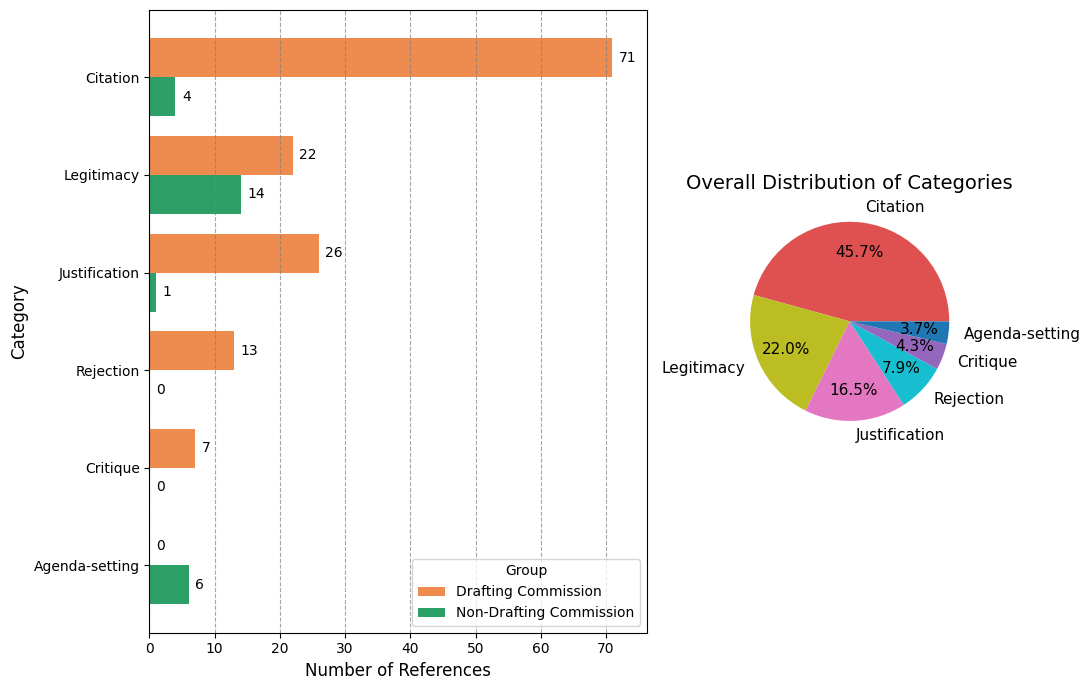

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_and_pie_chart_horizontal(file_path="outputs/Cuba/final_results.xlsx", save_path="/Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Cuba/visualizations/references_cuba.png"):
    """
    Generates a horizontal side-by-side bar chart where categories (Agenda-setting, Citation, etc.) are on the Y-axis,
    and the drafting commission membership (Drafting Commission vs. Non-Drafting Members) are separate bars.
    The pie chart remains unchanged but with Citation appearing at the top and adjusted label placement.
    """
    try:
        # Load the dataset
        df = pd.read_excel(file_path, dtype=str)

        # Drop missing or blank values in relevant columns
        df = df.dropna(subset=['tags', 'full_name', 'draft_commission'])
        df = df[(df['tags'].str.strip() != "") & (df['full_name'].str.strip() != "")]

        # Convert draft_commission from binary (1/0) to category labels
        df['draft_commission'] = df['draft_commission'].map({'1': 'Drafting Commission', '0': 'Non-Drafting Members'})

        # Ensure order before grouping
        category_order = ["Drafting Commission", "Non-Drafting Members"]
        df['draft_commission'] = pd.Categorical(df['draft_commission'], categories=category_order, ordered=True)

        # Count occurrences of each category per drafting group, ensuring zeroes appear
        category_group_counts = df.groupby(['tags', 'draft_commission'], observed=False).size().unstack(fill_value=0)

        # Rename categories
        rename_map = {
            'agenda': 'Agenda-setting',
            'citation': 'Citation',
            'critique': 'Critique',
            'justification': 'Justification',
            'legitimacy': 'Legitimacy',
            'rejection': 'Rejection'
        }
        category_group_counts = category_group_counts.rename(index=rename_map)

        # Sort by total references per category
        category_group_counts["Total"] = category_group_counts.sum(axis=1)
        category_group_counts = category_group_counts.sort_values(by="Total", ascending=True).drop(columns=["Total"])

        # Reorder columns so "Drafting Commission" appears on top in each category
        category_group_counts = category_group_counts[["Drafting Commission", "Non-Drafting Members"]]

        # Prepare pie chart data (sum all tag categories across groups)
        tag_totals = category_group_counts.sum(axis=1)

        # Sort the pie chart so Citation appears at the top
        tag_totals = tag_totals.sort_values(ascending=False)

        # Define color palette with muted and unique colors
        bar_colors = {
            'Drafting Commission': '#ee8c50',    # Orange
            'Non-Drafting Members': '#2ca066'   # Green
        }
        pie_colors = {
            'Agenda-setting': '#1f77b4',   # Blue
            'Citation': '#df5151',        # Red
            'Critique': '#9467bd',        # Purple
            'Justification': '#e377c2',   # Pink
            'Legitimacy': '#bcbd22',      # Olive
            'Rejection': '#17becf'        # Teal
        }

        # Create figure with two subplots
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 7), gridspec_kw={'width_ratios': [2, 1]})

        # Horizontal side-by-side bar chart
        width = 0.4  # Width of bars
        y = np.arange(len(category_group_counts.index))  # Y locations for categories

        bars1 = axes[0].barh(y + width/2, category_group_counts["Drafting Commission"], width, label="Drafting Commission", color=bar_colors["Drafting Commission"])
        bars2 = axes[0].barh(y - width/2, category_group_counts["Non-Drafting Members"], width, label="Non-Drafting Commission", color=bar_colors["Non-Drafting Members"])

        # Get maximum value for extending the x-axis
        max_value = max(category_group_counts.max())

        # Extend the x-axis limit to allow space for count labels
        axes[0].set_xlim(0, max_value * 1.075)  # Extends by 10% of max value

        
        # Add counts on the end of each bar, including zero values
        for bars in [bars1, bars2]:
            for bar in bars:
                width_value = bar.get_width()
                axes[0].text(width_value + 1, bar.get_y() + bar.get_height()/2, f"{int(width_value)}",
                             ha='left', va='center', fontsize=10)

        # Formatting
        axes[0].set_xlabel("Number of References", fontsize=12)
        axes[0].set_ylabel("Category", fontsize=12)
        axes[0].set_yticks(y)
        axes[0].set_yticklabels(category_group_counts.index)

        # Add grey grid lines
        axes[0].grid(axis='x', linestyle="--", alpha=0.7, color='grey')

        # Keep legend in lower right corner
        legend = axes[0].legend(title="Group", loc="lower right", fontsize=10)

        # Adjusted pie chart for overall category distribution
        wedges, texts, autotexts = axes[1].pie(
            tag_totals, labels=tag_totals.index, autopct='%1.1f%%',
            colors=[pie_colors[col] for col in tag_totals.index],
            pctdistance=0.7,
            labeldistance=1.15,  # Pushes labels further into their respective sections
            textprops={'fontsize': 11}
        )
        axes[1].set_title("Overall Distribution of Categories", fontsize=14)

        # Adjust layout
        plt.tight_layout()

        # Save the figure as PNG
        plt.savefig(save_path)

        # Show the plot
        plt.show()

    except Exception as e:
        print(f"Error processing the file: {e}")

# Run the function and save the plot
plot_bar_and_pie_chart_horizontal(file_path="outputs/Cuba/final_results.xlsx", save_path="/Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Cuba/visualizations/references_cuba.png")


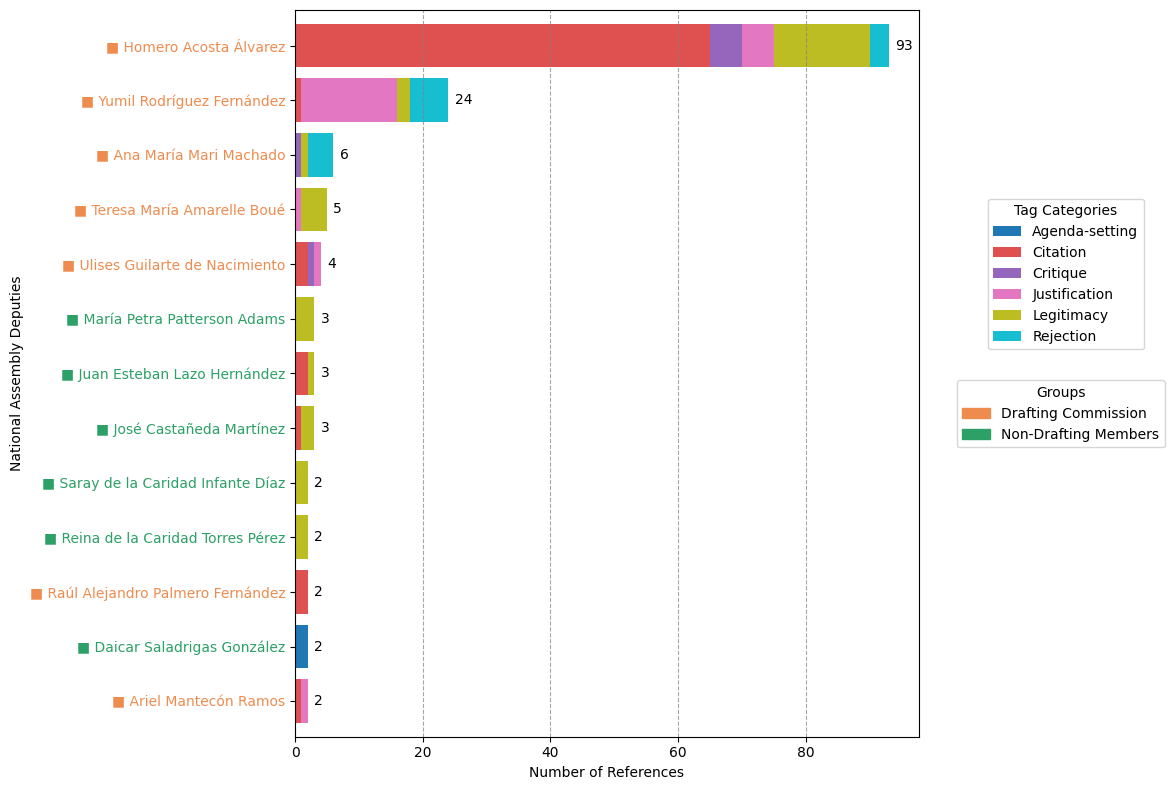

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_stacked_bar_chart(file_path="outputs/Cuba/final_results.xlsx", save_path="/Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Cuba/visualizations/tags_by_speaker_cuba.png"):
    """
    Reads the final results Excel file, counts occurrences of public input references per speaker (from the 'full_name' column),
    and visualizes total references per speaker as a stacked bar chart with separate legends for Tag Category and Drafting Commission membership.
    """
    try:
        # Load the dataset
        df = pd.read_excel(file_path, dtype=str)

        # Drop missing or blank values in 'tags', 'full_name', and 'draft_commission' columns
        df = df.dropna(subset=['tags', 'full_name', 'draft_commission'])
        df = df[(df['tags'].str.strip() != "") & (df['full_name'].str.strip() != "")]

        # Convert draft_commission from binary (1/0) to category labels
        df['draft_commission'] = df['draft_commission'].map({'1': 'Drafting Commission', '0': 'Non-Drafting Members'})

        # Count occurrences of each tag per speaker
        speaker_tag_counts = df.groupby(['full_name', 'tags']).size().unstack(fill_value=0)

        # Merge drafting commission membership into speaker names
        speaker_membership = df[['full_name', 'draft_commission']].drop_duplicates().set_index('full_name')
        speaker_tag_counts = speaker_tag_counts.merge(speaker_membership, left_index=True, right_index=True, how='left')

        # Rename categories to match the defined color dictionary
        rename_map = {
            'agenda': 'Agenda-setting',
            'citation': 'Citation',
            'critique': 'Critique',
            'justification': 'Justification',
            'legitimacy': 'Legitimacy',
            'rejection': 'Rejection'
        }
        speaker_tag_counts = speaker_tag_counts.rename(columns=rename_map)

        # Add total references column (sum across all tag categories)
        speaker_tag_counts['Total References'] = speaker_tag_counts[list(rename_map.values())].sum(axis=1)

        # **FILTER: Only include speakers with more than 1 total reference**
        speaker_tag_counts = speaker_tag_counts[speaker_tag_counts['Total References'] > 1]

        # Define Drafting Commission color mapping
        dc_colors = {
            'Drafting Commission': '#ee8c50',    # Orange for DC members
            'Non-Drafting Members': '#2ca066'   # Green for Non-DC members
        }

        # Define category color palette
        category_colors = {
            'Agenda-setting': '#1f77b4',  # Blue
            'Citation': '#df5151',        # Red
            'Critique': '#9467bd',        # Purple
            'Justification': '#e377c2',   # Pink
            'Legitimacy': '#bcbd22',      # Olive
            'Rejection': '#17becf'        # Teal
        }

        # **Sort by total references in ascending order**
        speaker_tag_counts = speaker_tag_counts.sort_values(by='Total References', ascending=True)

        # Plot stacked bar chart
        fig, ax = plt.subplots(figsize=(12, 8))
        speaker_tag_counts.drop(columns=['Total References', 'draft_commission']).plot(
            kind='barh', stacked=True, ax=ax, width=0.8,
            color=[category_colors[col] for col in speaker_tag_counts.columns if col in category_colors]
        )

        # **Modify y-axis labels with color-coded squares**
        ax.set_yticklabels([
            f"\u25A0 {name}" 
            for name in speaker_tag_counts.index
        ])

        # **Apply color to each square based on DC membership**
        for tick_label, (index, row) in zip(ax.get_yticklabels(), speaker_tag_counts.iterrows()):
            tick_label.set_color(dc_colors.get(row['draft_commission'], '#000000'))  # Default to black if missing

        # **Add total count to the right of each bar**
        for i, total in enumerate(speaker_tag_counts['Total References']):
            ax.text(total + 1, i, str(total), va='center', fontsize=10)  # Adds count to the right
        
        # Formatting
        ax.set_xlabel("Number of References")
        ax.set_ylabel("National Assembly Deputies")

        # **Legend for Tag Categories**
        tag_legend = ax.legend(
            title="Tag Categories",
            bbox_to_anchor=(1.1, 0.75), loc='upper left'
        )

        # **Legend for Drafting Commission Membership**
        from matplotlib.patches import Patch
        dc_legend_patches = [
            Patch(color=dc_colors['Drafting Commission'], label="Drafting Commission"),
            Patch(color=dc_colors['Non-Drafting Members'], label="Non-Drafting Members")
        ]
        ax.legend(
            handles=dc_legend_patches, title="Groups",
            bbox_to_anchor=(1.05, 0.5), loc='upper left'
        )

        # Add both legends back to the plot
        ax.add_artist(tag_legend)

        # Add vertical grid lines from the x-axis
        ax.xaxis.grid(True, linestyle='--', color='grey', alpha=0.7)


        # Display the chart
        plt.tight_layout()
        plt.savefig(save_path)
        plt.show()

    except Exception as e:
        print(f"Error processing the file: {e}")

# Run the function
plot_stacked_bar_chart(file_path="outputs/Cuba/final_results.xlsx", save_path="/Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Cuba/visualizations/tags_by_speaker_cuba.png")


#### References by group

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_excel("outputs/Cuba/final_results.xlsx", dtype=str)

# Drop missing or blank values in relevant columns
df = df.dropna(subset=['tags', 'full_name', 'draft_commission'])
df = df[(df['tags'].str.strip() != "") & (df['full_name'].str.strip() != "")]

# Convert draft_commission from binary (1/0) to category labels
df['draft_commission'] = df['draft_commission'].map({'1': 'Drafting Commission', '0': 'Non-Drafting Members'})

# Count the total references for each group
group_counts = df.groupby('draft_commission')['tags'].count()

# Calculate the percentages and round to one decimal
total_references = group_counts.sum()
group_percentages = (group_counts / total_references) * 100
group_percentages_rounded = group_percentages.round(1)

# Display the results with percentages in parentheses
for group in group_counts.index:
    print(f"{group}: {group_counts[group]} ({group_percentages_rounded[group]}%)")


Drafting Commission: 139 (84.8%)
Non-Drafting Members: 25 (15.2%)


#### N-Gram Frequencies

Plot saved to /Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Cuba/visualizations/ngram_frequencies_cuba.png


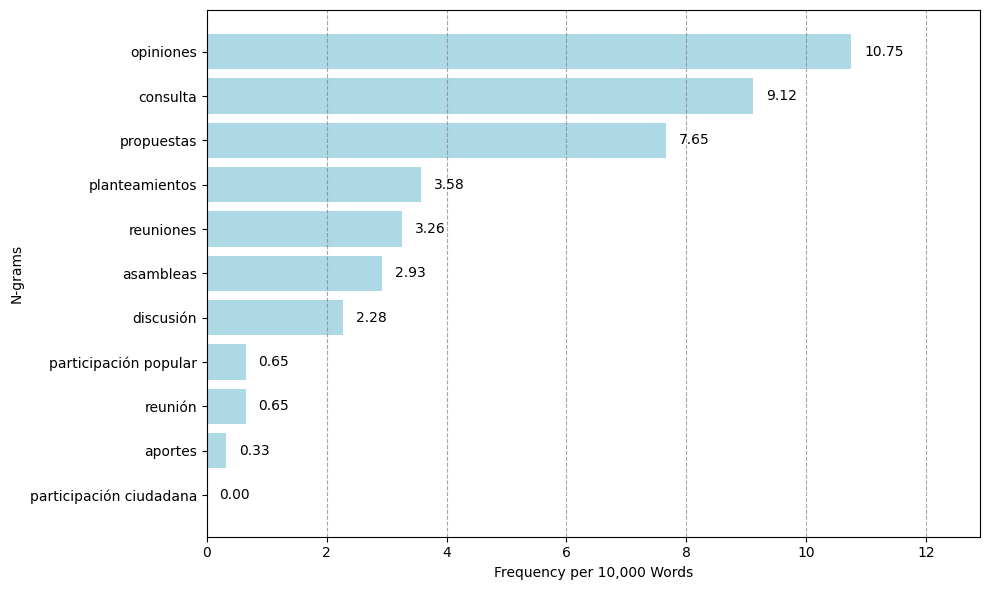

In [32]:
# Updated N-gram List for Public Consultation in Spanish
ngram_list = [
    "aportes", "asambleas", "consulta", "discusión", "opiniones", "participación popular", 
    "participación ciudadana", "planteamientos", "propuestas", "reunión", "reuniones", 
]

def calculate_ngram_references_per_10000(data, ngram_list):
    """
    Calculate references to n-grams per 10,000 words independently of the global n-gram tool.

    Parameters:
    - data: List of tuples, where each tuple contains segment metadata and text. Example: [(id, text), ...]
    - ngram_list: List of n-grams to calculate frequencies for.

    Returns:
    - Dictionary of n-grams with their frequency per 10,000 words.
    """
    # Safeguard against empty data
    if not data:
        print("No data found. Cannot calculate n-gram frequencies.")
        return {}
    
    # Calculate total words across all segments
    total_words = sum(len(segment[1].split()) for segment in data if segment[1])  # Count only non-empty texts
    if total_words == 0:
        print("No words found in data. Cannot calculate n-gram frequencies.")
        return {}

    # Calculate frequencies for each n-gram
    frequencies = {}
    for ngram in ngram_list:
        # Count how many times this n-gram appears across all texts
        ngram_count = sum(
            segment[1].lower().count(ngram.lower())
            for segment in data
            if segment[1]  # Skip empty texts
        )
        # Normalize by total words
        freq_per_10000 = (ngram_count / total_words) * 10000
        frequencies[ngram] = freq_per_10000

    return frequencies

def plot_ngram_frequencies(frequencies, save_path=None):
    """
    Plot the frequencies of n-grams as a bar chart with values displayed next to the bars.

    Parameters:
    - frequencies: Dictionary of n-grams and their frequencies.
    """
    import matplotlib.pyplot as plt

    # Sort frequencies for better visualization
    sorted_frequencies = dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True))

    # Extract keys and values
    ngrams = list(sorted_frequencies.keys())
    values = list(sorted_frequencies.values())

    # Plot
    plt.figure(figsize=(10, 6))
    bars = plt.barh(ngrams, values, color="lightblue")

    # Calculate the maximum x-limit based on the highest frequency
    max_frequency = max(values)
    plt.xlim(0, max_frequency * 1.2)  # Extend x-axis slightly to the right

    # Add values to the right of the bars
    for bar, value in zip(bars, values):
        text_position = bar.get_width() + max_frequency * 0.02  # Position slightly to the right of the bar
        plt.text(
            text_position,  # Adjust text placement
            bar.get_y() + bar.get_height() / 2,  # Center vertically
            f"{value:.2f}",  # Format the value
            va='center',
            ha='left',  # Align text to the left
            fontsize=10
        )

    # Add a minimalist grid
    plt.grid(
        axis="x",  # Apply grid only to the X-axis
        linestyle="--",  # Use dashed lines
        alpha=0.7,  # Set transparency for subtlety
        color="gray"  # Use a neutral grid color
    )

    plt.xlabel("Frequency per 10,000 Words")
    plt.ylabel("N-grams")
    plt.tight_layout()
    plt.gca().invert_yaxis()  # Invert the Y-axis to show the highest frequency at the top

    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Plot saved to {save_path}")

    
    plt.show()

# Path to save the plot
save_path = "/Users/mattmartin/Documents/Graduate School/CCP/matt_ship/analysis/outputs/Cuba/visualizations/ngram_frequencies_cuba.png"  # Save in the current working directory or provide a full path

# Extract all segments from your sorted_segments or use your actual data
data = [(segment_id, segment.get("text", "")) for segment_id, segment in sorted_segments]

# Calculate n-gram frequencies
frequencies = calculate_ngram_references_per_10000(data, ngram_list)

# Plot the results
if frequencies:  # Ensure there is data to plot
    plot_ngram_frequencies(frequencies, save_path=save_path)

#### Leadership

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel("outputs/Cuba/final_results.xlsx", dtype=str)

# Drop missing or blank values in relevant columns
df = df.dropna(subset=['tags', 'full_name', 'draft_commission', 'central_committee', 'politburo'])
df = df[(df['tags'].str.strip() != "") & (df['full_name'].str.strip() != "")]

# Convert draft_commission from binary (1/0) to category labels
df['draft_commission'] = df['draft_commission'].map({'1': 'Drafting Commission', '0': 'Non-Drafting Members'})

# Filter the data to only include members of the Drafting Commission
drafting_commission_df = df[df['draft_commission'] == 'Drafting Commission']

# Count how many unique members of the Drafting Commission referenced public input
# Assuming that public input references are captured in the 'tags' column (non-empty tags)
drafting_commission_references = drafting_commission_df[drafting_commission_df['tags'].str.strip() != ""]
drafting_commission_speakers = drafting_commission_references['full_name'].nunique()

# Count how many of the Drafting Commission speakers who referenced public input are part of the Central Committee
central_committtee_members = drafting_commission_references[drafting_commission_references['central_committee'] == '1']
central_committtee_speakers = central_committtee_members['full_name'].nunique()
central_committtee_percentage = (central_committtee_speakers / drafting_commission_speakers) * 100

# Count how many of the Drafting Commission speakers who referenced public input are part of the Politburo
poliburo_members = drafting_commission_references[drafting_commission_references['politburo'] == '1']
poliburo_speakers = poliburo_members['full_name'].nunique()
poliburo_percentage = (poliburo_speakers / drafting_commission_speakers) * 100

# Display the results
print(f"Total number of Drafting Commission speakers who referenced public input: {drafting_commission_speakers}")
print(f"Number and percentage of these speakers in the Central Committee: {central_committtee_speakers} ({central_committtee_percentage:.1f}%)")
print(f"Number and percentage of these speakers in the Politburo: {poliburo_speakers} ({poliburo_percentage:.1f}%)")
